In [43]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
# load all the pre-processed static, high frequency, mxm outcomes and labels
preproc_data_dir = '/cluster/tufts/hugheslab/prath01/projects/MASTRE/datasets/'
static_df = pd.read_csv(os.path.join(preproc_data_dir, 'static_features.csv'))
highfreq_df = pd.read_csv(os.path.join(preproc_data_dir, 'highfreq_features.csv'))
mxm_df = pd.read_csv(os.path.join(preproc_data_dir, 'marksmanship_outcomes.csv'))
task_labels_df = pd.read_csv(os.path.join(preproc_data_dir, 'task_labels.csv'))
leg_labels_df = pd.read_csv(os.path.join(preproc_data_dir, 'leg_labels.csv'))
arm_labels_df = pd.read_csv(os.path.join(preproc_data_dir, 'arm_labels.csv'))
momentary_labels_df = pd.read_csv(os.path.join(preproc_data_dir, 'momentary_labels.csv'))

In [74]:
subj_id = 2002
mission_phase = 'Post'
subj_mission_highfreq_df = highfreq_df[(highfreq_df.subject_uid==subj_id)&(highfreq_df.mission_phase==mission_phase)].reset_index(drop=True)
subj_mission_leg_labels_df = leg_labels_df[(leg_labels_df.subject_uid==subj_id)&(leg_labels_df.session==mission_phase)].reset_index(drop=True)

In [75]:
subj_mission_leg_labels_df 

,subject_uid,session,leg_action_start_timestamp,leg_action_end_timestamp,leg_action_start_seconds_from_sensor_start,leg_action_end_seconds_from_sensor_start,leg_action_name
0,2002,Post,06/06/2018 13:31:31.000,06/06/2018 13:31:42.000,4005.554,4016.554,unknown
1,2002,Post,06/06/2018 13:31:42.000,06/06/2018 13:32:51.000,4016.554,4085.554,standing
2,2002,Post,06/06/2018 13:32:51.000,06/06/2018 13:34:44.000,4085.554,4198.554,running
3,2002,Post,06/06/2018 13:34:44.000,06/06/2018 13:35:01.000,4198.554,4215.554,walking
4,2002,Post,06/06/2018 13:35:01.000,06/06/2018 13:35:34.000,4215.554,4248.554,standing
5,2002,Post,06/06/2018 13:35:34.000,06/06/2018 13:35:52.000,4248.554,4266.554,running
6,2002,Post,06/06/2018 13:35:52.000,06/06/2018 13:36:30.000,4266.554,4304.554,prone
7,2002,Post,06/06/2018 13:36:30.000,06/06/2018 13:36:36.000,4304.554,4310.554,running
8,2002,Post,06/06/2018 13:36:36.000,06/06/2018 13:36:51.000,4310.554,4325.554,standing
9,2002,Post,06/06/2018 13:36:51.000,06/06/2018 13:36:57.000,4325.554,4331.554,running


In [17]:
subj_mission_highfreq_df

,timestamp,Vertical,Lateral,Sagittal,EcgWaveform,BreathingWaveform,HR,BR,Posture,Activity,...,ECGAmplitude,HRV,CoreTemp,WalkSteps,RunSteps,Jumps,PeakAccelPhi,peakAccelTheta,subject_uid,mission_phase
2961192,06/06/2018 08:12:36.437,509,533,515,297,0,65,6553.5,-85,0.21,...,0.0000,65535,6553.5,0,0,0,98,99,2401,Post
2961193,06/06/2018 08:12:37.437,509,533,516,297,0,65,6553.5,-84,0.13,...,0.0000,65535,6553.5,0,0,0,98,98,2401,Post
2961194,06/06/2018 08:12:38.437,509,533,515,297,0,65,6553.5,-83,0.05,...,0.0000,65535,6553.5,0,0,0,97,99,2401,Post
2961195,06/06/2018 08:12:39.437,509,533,516,297,0,65,6553.5,-83,0.03,...,0.0000,65535,6553.5,0,0,0,100,101,2401,Post
2961196,06/06/2018 08:12:40.437,509,534,515,297,0,65,6553.5,-83,0.03,...,0.0000,65535,6553.5,0,0,0,101,100,2401,Post
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982341,06/06/2018 14:05:05.437,503,531,522,1344,6534252,65,9.0,-66,0.11,...,0.0051,65535,35.8,1334,865,1,105,114,2401,Post
2982342,06/06/2018 14:05:06.437,504,529,522,1940,6535076,65,9.0,-67,0.10,...,0.0051,65535,35.8,1334,865,1,79,105,2401,Post
2982343,06/06/2018 14:05:07.437,520,530,510,3798,6582393,65,9.0,-72,0.52,...,0.0051,65535,35.8,1334,865,1,64,78,2401,Post
2982344,06/06/2018 14:05:08.437,502,530,506,1719,8005593,64,9.0,65,0.51,...,0.0051,65535,35.8,1334,865,1,157,101,2401,Post


In [36]:
highfreq_timedelta_from_sensor_start = pd.to_datetime(subj_mission_highfreq_df.timestamp) - pd.to_datetime(subj_mission_highfreq_df.timestamp[0])
highfreq_seconds_from_sensor_start = [i.total_seconds() for i in highfreq_timedelta_from_sensor_start]


leg_labels_timedelta_from_sensor_start = pd.to_datetime(subj_mission_leg_labels_df.leg_action_start_timestamp) - pd.to_datetime(subj_mission_highfreq_df.timestamp[0])
leg_labels_seconds_from_sensor_start = [i.total_seconds() for i in leg_labels_timedelta_from_sensor_start]



In [51]:
subj_mission_leg_labels_df['seconds_from_Sensor_start'] = leg_labels_seconds_from_sensor_start

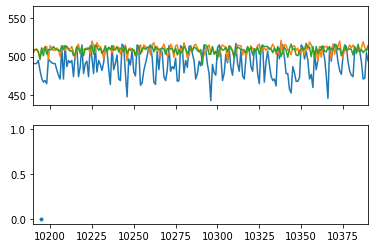

In [56]:
f, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(highfreq_seconds_from_sensor_start, subj_mission_highfreq_df.Vertical.values, label='vertical')
axs[0].plot(highfreq_seconds_from_sensor_start, subj_mission_highfreq_df.Sagittal.values, label='sagittal')
axs[0].plot(highfreq_seconds_from_sensor_start, subj_mission_highfreq_df.Lateral.values, label='lateral')

axs[1].plot(leg_labels_seconds_from_sensor_start, (subj_mission_leg_labels_df.leg_action_name.values=='walking')*1.0, '.')
axs[1].set_xlim([10190, 10390])
plt.show()

In [52]:
subj_mission_leg_labels_df

,subject_uid,session,leg_action_start_timestamp,leg_action_end_timestamp,leg_action_name,seconds_from_Sensor_start
0,2401,Post,06/06/2018 10:53:17.000,06/06/2018 10:53:39.000,unknown,9640.563
1,2401,Post,06/06/2018 10:53:39.000,06/06/2018 10:58:46.000,sitting,9662.563
2,2401,Post,06/06/2018 10:58:46.000,06/06/2018 10:58:51.000,walking,9969.563
3,2401,Post,06/06/2018 10:58:51.000,06/06/2018 10:59:12.000,standing,9974.563
4,2401,Post,06/06/2018 10:59:12.000,06/06/2018 10:59:17.000,walking,9995.563
5,2401,Post,06/06/2018 10:59:17.000,06/06/2018 11:00:57.000,standing,10000.563
6,2401,Post,06/06/2018 11:00:57.000,06/06/2018 11:01:06.000,walking,10100.563
7,2401,Post,06/06/2018 11:01:06.000,06/06/2018 11:01:21.000,standing,10109.563
8,2401,Post,06/06/2018 11:01:21.000,06/06/2018 11:01:26.000,walking,10124.563
9,2401,Post,06/06/2018 11:01:26.000,06/06/2018 11:01:31.000,standing,10129.563
